In [2]:
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from getdist.mcsamples import MCSamples
import getdist.plots as plots
import astropy.io.fits as fits
import numpy as np
%matplotlib inline
#os.system('module load /software/modulefiles/texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 17})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/project/chihway/jjefferson/nt_proj/apjfonts}')
        
plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'

kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple

In [1]:
DESfile_T = '../../../cosmosis-standard-library/chain_output/DES-Y3/TheoryDV.txt' #this is the chain of the uncontaminated theory dv generated with the DESKIDS Hybrid analysis pipeline.
DESfile_Ci = '../../../cosmosis-standard-library/chain_output/DES-Y3/NEWruns/ContaminatedDV-inf_1KJK_catms.txt'
DESfile_Cs = '../../../cosmosis-standard-library/chain_output/DES-Y3/NEWruns/ContaminatedDV-sup_1KJK_catms.txt'

HSCfile_T = '../../../cosmosis-standard-library/chain_output/HSC-Y3/TheoryDV-xiponly.txt' #this is the chain of the uncontaminated theory dv generated with the DESKIDS Hybrid analysis pipeline.
HSCfile_Ci = '../../../cosmosis-standard-library/chain_output/HSC-Y3/NEWruns/ContaminatedDV-xiponly-150JKcatms-inf.txt'
HSCfile_Cs = '../../../cosmosis-standard-library/chain_output/HSC-Y3/NEWruns/ContaminatedDV-xiponly-150JKcatms-sup.txt'


KiDSfile_T = '../../../cosmosis-standard-library/chain_output/KiDS-1000/TheoryDV.txt' #this is the chain of the uncontaminated theory dv generated with the DESKIDS Hybrid analysis pipeline.
KiDSfile_Ci = '../../../cosmosis-standard-library/chain_output/KiDS-1000/ContaminatedDV-inf.txt'
KiDSfile_Cs = '../../../cosmosis-standard-library/chain_output/KiDS-1000/ContaminatedDV-sup.txt'

In [3]:
def load_chain0(file,verbose=False):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a=first_line.split("\t")
    if verbose==True:
        for i in range(0,len(a)-4):
            print("[%02d] %s"%(i,a[i].split('--')[1]))
        for i in range(len(a)-4,len(a)):
            print("[%02d] %s"%(i,a[i]))

    if verbose==True: print(subprocess.check_output(['tail', '-3', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = 0#int(subprocess.check_output(['tail', '-3', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain,nlines

In [4]:
dT,_ = load_chain0(DESfile_T,verbose=False)
dCi,_ =load_chain0(DESfile_Ci,verbose=False)
dCs,_ =load_chain0(DESfile_Cs,verbose=False)

hT,_ = load_chain0(HSCfile_T,verbose=False)
hCi,_ =load_chain0(HSCfile_Ci,verbose=False)
hCs,_ =load_chain0(HSCfile_Cs,verbose=False)

kT,_ = load_chain0(KiDSfile_T,verbose=False)
kCi,_ =load_chain0(KiDSfile_Ci,verbose=False)
kCs,_ =load_chain0(KiDSfile_Cs,verbose=False)

In [5]:
dchain = MCSamples(samples = np.c_[dT[:,0], dT[:,4]],
                              weights = np.exp(dT[:,-3]),
                              names = [r'$\Omega_m$',r'$S_8$'], label = 'DES Theory')
dchainCi = MCSamples(samples = np.c_[dCi[:,0],dCi[:,4]], weights = np.exp(dCi[:,-3]), names   = [r'$\Omega_m$',r'$S_8$'],label   = "Contaminated -2sig")
dchainCs = MCSamples(samples = np.c_[dCs[:,0],dCs[:,4]], weights = np.exp(dCs[:,-3]), names   = [r'$\Omega_m$',r'$S_8$'], label   = "Contaminated +2sig")

hchain = MCSamples(samples = np.c_[hT[:,0], hT[:,4]], weights = np.exp(hT[:,-3]),     names   = [r'$\Omega_m$',r'$S_8$'])#, label = "HSC Theory")
hchainCi = MCSamples(samples = np.c_[hCi[:,0],hCi[:,4]], weights = np.exp(hCi[:,-3]), names   = [r'$\Omega_m$',r'$S_8$'])#,label   = "Contaminated -2sig")
hchainCs = MCSamples(samples = np.c_[hCs[:,0],hCs[:,4]], weights = np.exp(hCs[:,-3]), names   = [r'$\Omega_m$',r'$S_8$'])#, label   = "Contaminated +2sig")

kchain = MCSamples(samples = np.c_[kT[:,0], kT[:,4]], weights = np.exp(kT[:,-3]),     names   = [r'$\Omega_m$',r'$S_8$'])#, label = "KiDS Theory")
kchainCi = MCSamples(samples = np.c_[kCi[:,0],kCi[:,4]], weights = np.exp(kCi[:,-3]), names   = [r'$\Omega_m$',r'$S_8$'])#,label   = "Contaminated -2sig")
kchainCs = MCSamples(samples = np.c_[kCs[:,0],kCs[:,4]], weights = np.exp(kCs[:,-3]), names   = [r'$\Omega_m$',r'$S_8$'])#, label   = "Contaminated +2sig")


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


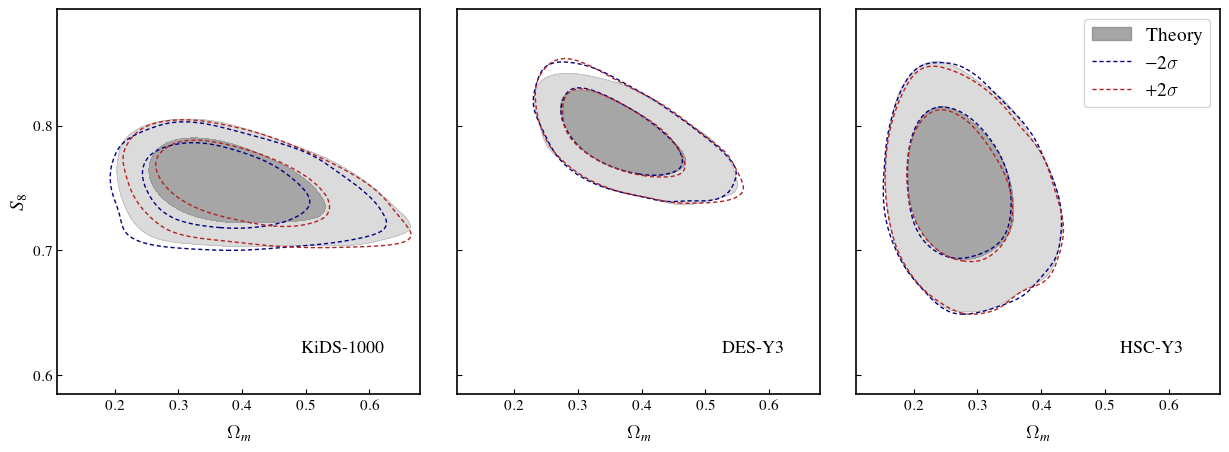

<Figure size 600x450 with 0 Axes>

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15, 5),sharey=True,sharex=True)
matplotlib.rcParams.update({'font.size': 13})

g=plots.get_single_plotter()

g.legend_frame=False
g.settings.figure_legend_frame = False
g.settings.line_labels =False
g.settings.fontsize=14
g.settings.legend_fontsize=14
g.settings.scaling = False

g.plot_2d(kchain, r'$\Omega_m$',r'$S_8$', filled=True, colors=['grey'], alphas=[0.7], ax=ax1);
g.plot_2d(kchainCi, r'$\Omega_m$',r'$S_8$', filled=False,colors=['navy'], ls='--', ax=ax1);
g.plot_2d(kchainCs, r'$\Omega_m$',r'$S_8$', filled=False,colors=['firebrick'], ls='--', ax=ax1);
g.add_legend(legend_labels=['Theory',r'$-2\sigma$',r'$+2\sigma$'],ax=ax3)

g.plot_2d(dchain, r'$\Omega_m$',r'$S_8$', filled=True, colors=['grey'], alphas=[0.7], ax=ax2);
g.plot_2d(dchainCi, r'$\Omega_m$',r'$S_8$', filled=False,colors=['navy'], ls='--', ax=ax2);
g.plot_2d(dchainCs, r'$\Omega_m$',r'$S_8$', filled=False,colors=['firebrick'], ls='--', ax=ax2);
g.plot_2d(hchain, r'$\Omega_m$',r'$S_8$', filled=True, colors=['grey'], alphas=[0.7], ax=ax3);
g.plot_2d(hchainCi, r'$\Omega_m$',r'$S_8$', filled=False,colors=['navy'], ls='--', ax=ax3);
g.plot_2d(hchainCs, r'$\Omega_m$',r'$S_8$', filled=False,colors=['firebrick'], ls='--', ax=ax3);


ax1.text(0.9,0.1,r'KiDS-1000',transform=ax1.transAxes,ha='right',va='bottom',size=13)
ax2.text(0.9,0.1,r'DES-Y3',transform=ax2.transAxes,ha='right',va='bottom',size=13)
ax3.text(0.9,0.1,r'HSC-Y3',transform=ax3.transAxes,ha='right',va='bottom',size=13)
ax1.set_xlim([0.11,0.68])
ax2.set_xlim([0.11,0.68])
ax3.set_xlim([0.11,0.68])

ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.tick_params(axis="both",which='both',direction="in")
ax2.tick_params(axis="both",which='both',direction="in")
ax3.tick_params(axis="both",which='both',direction="in")

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.2)
    ax2.spines[axis].set_linewidth(1.2)
    ax3.spines[axis].set_linewidth(1.2)
fig.subplots_adjust(wspace=0.1)

fig.savefig('cosmochains.pdf',dpi=200,bbox_inches='tight')